# 1 architecture

In [2]:

import sys
sys.path.append('/notebooks/pytorch_timeseries')
from torch.optim import Optimizer, Adam
import pandas as pd
pd.options.mode.chained_assignment = None
import torch.nn as nn
from torch_timeseries.datasets.splitter import SequenceRandomSplitter
from torch_timeseries.datasets.wrapper import MultiStepTimeFeatureSet
from torch_timeseries.datasets import PEMS_BAY, ETTh1
from torch_timeseries.data.scaler import MaxAbsScaler, StandarScaler
import matplotlib.pyplot as plt

In [3]:

# dataset = PEMS_BAY('/notebooks/pytorch_timeseries/data')
dataset = ETTh1('/notebooks/pytorch_timeseries/data')


Using downloaded and verified file: /notebooks/pytorch_timeseries/data/ETTh1/ETTh1.csv


In [25]:
def mvts_fig(truths,start_node, end_node:int,start:int , end:int):
    # 创建图形和子图
    num_nodes = end_node - start_node 
    fig, axs = plt.subplots(end_node - start_node,figsize=(80, 6*num_nodes))
    for i in range(num_nodes):
        # 绘制时序数据
        print(i)
        axs[i].plot(truths[start:end,i])
    return fig

dataset.data[3:30, 3]

array([0.391     , 0.46200001, 0.53299999, 0.78200001, 1.03100002,
       1.17299998, 0.81699997, 0.85299999, 0.85299999, 0.85299999,
       1.24399996, 1.35000002, 1.35000002, 0.78200001, 0.71100003,
       1.20799994, 1.20799994, 1.20799994, 1.20799994, 1.17299998,
       1.13699996, 1.31500006, 1.35000002, 1.49199998, 1.49199998,
       1.49199998, 1.70599997])

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
0,2016-07-01 00:00:00,5.827,2.009,1.599,0.462,4.203,1.340,30.531000
1,2016-07-01 01:00:00,5.693,2.076,1.492,0.426,4.142,1.371,27.787001
2,2016-07-01 02:00:00,5.157,1.741,1.279,0.355,3.777,1.218,27.787001
3,2016-07-01 03:00:00,5.090,1.942,1.279,0.391,3.807,1.279,25.044001
4,2016-07-01 04:00:00,5.358,1.942,1.492,0.462,3.868,1.279,21.948000
...,...,...,...,...,...,...,...,...
17415,2018-06-26 15:00:00,-1.674,3.550,-5.615,2.132,3.472,1.523,10.904000
17416,2018-06-26 16:00:00,-5.492,4.287,-9.132,2.274,3.533,1.675,11.044000
17417,2018-06-26 17:00:00,2.813,3.818,-0.817,2.097,3.716,1.523,10.271000
17418,2018-06-26 18:00:00,9.243,3.818,5.472,2.097,3.655,1.432,9.778000


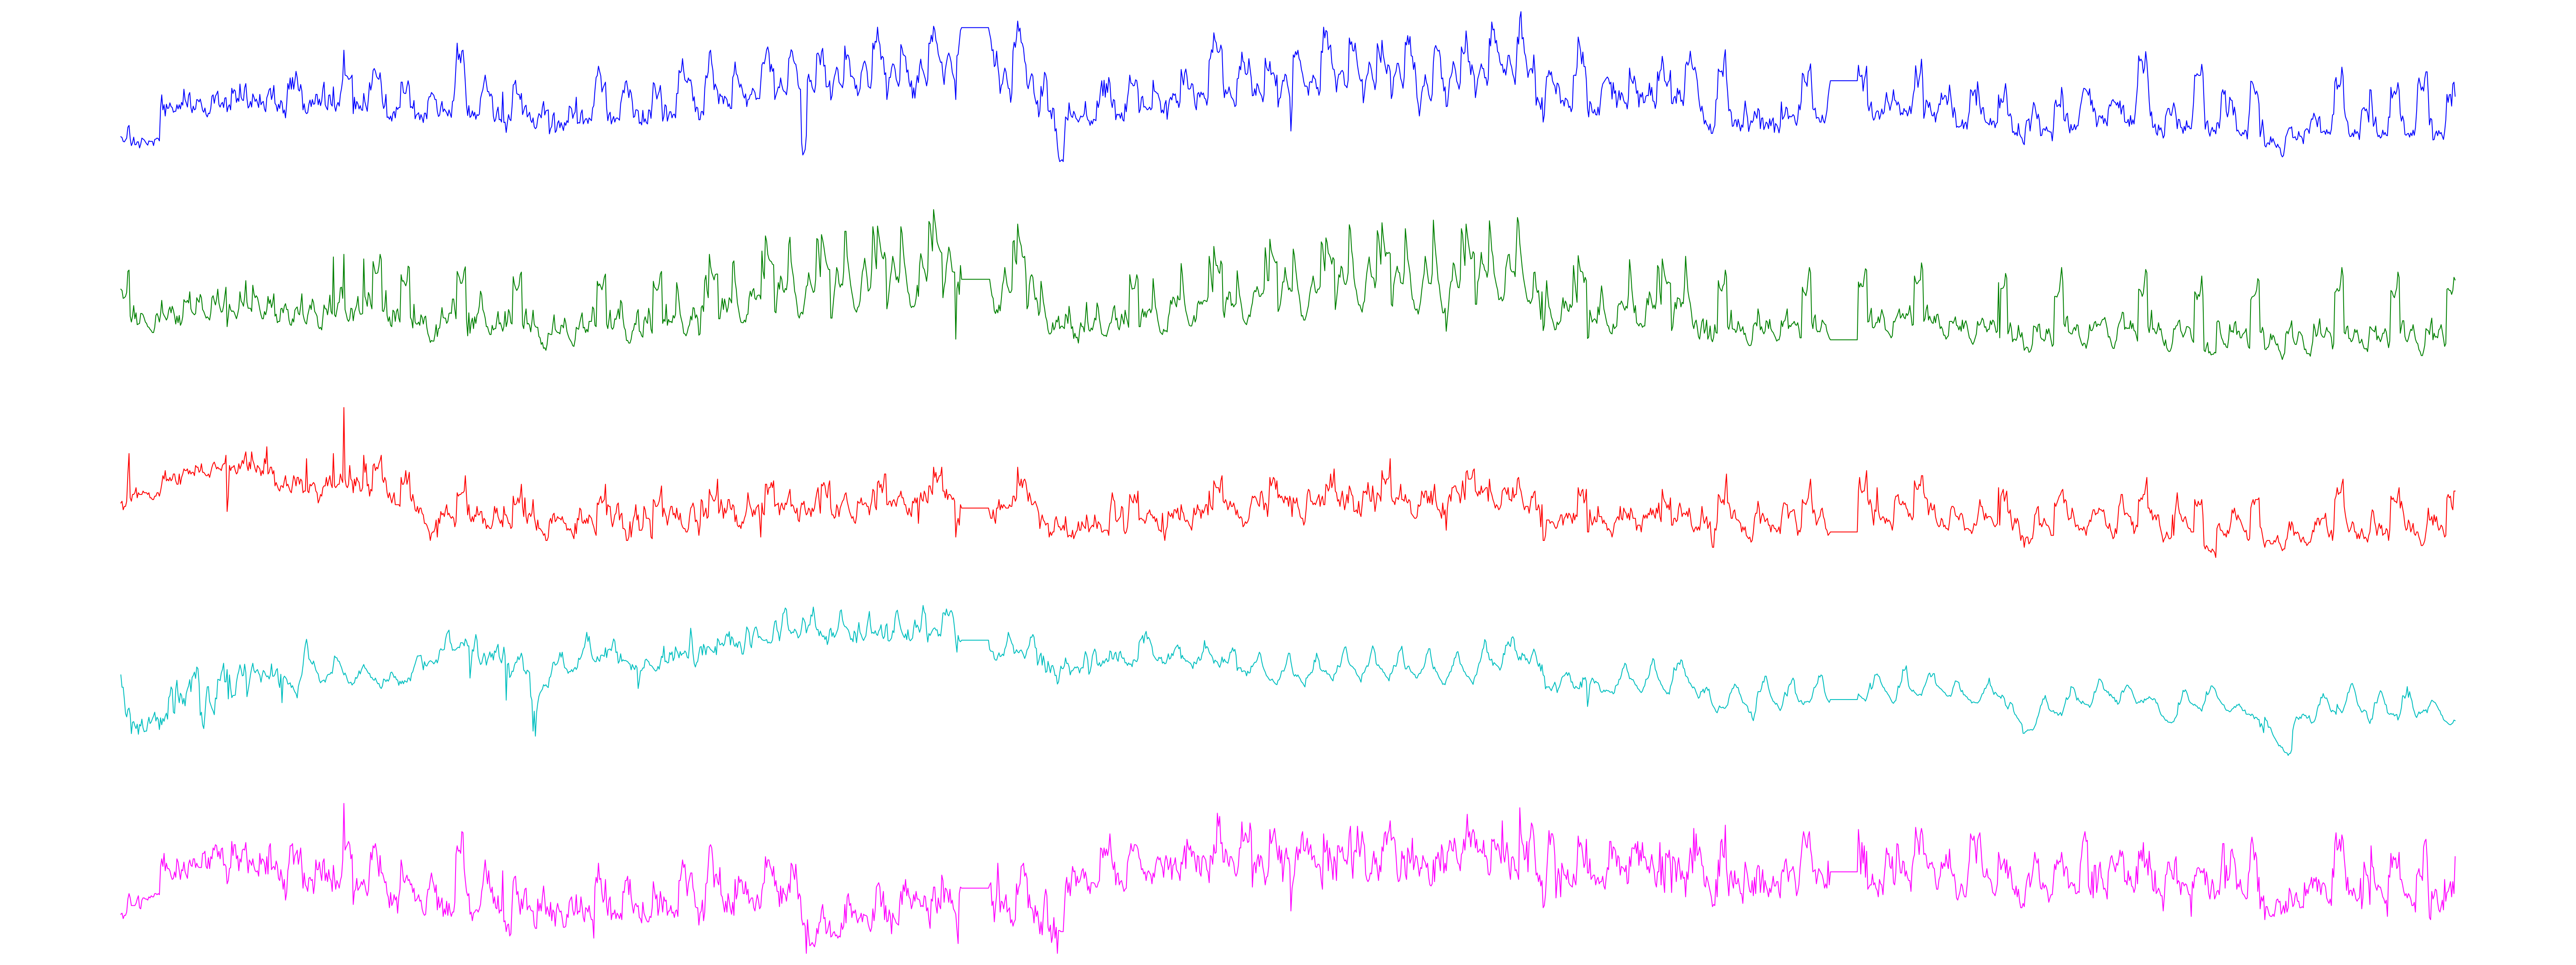

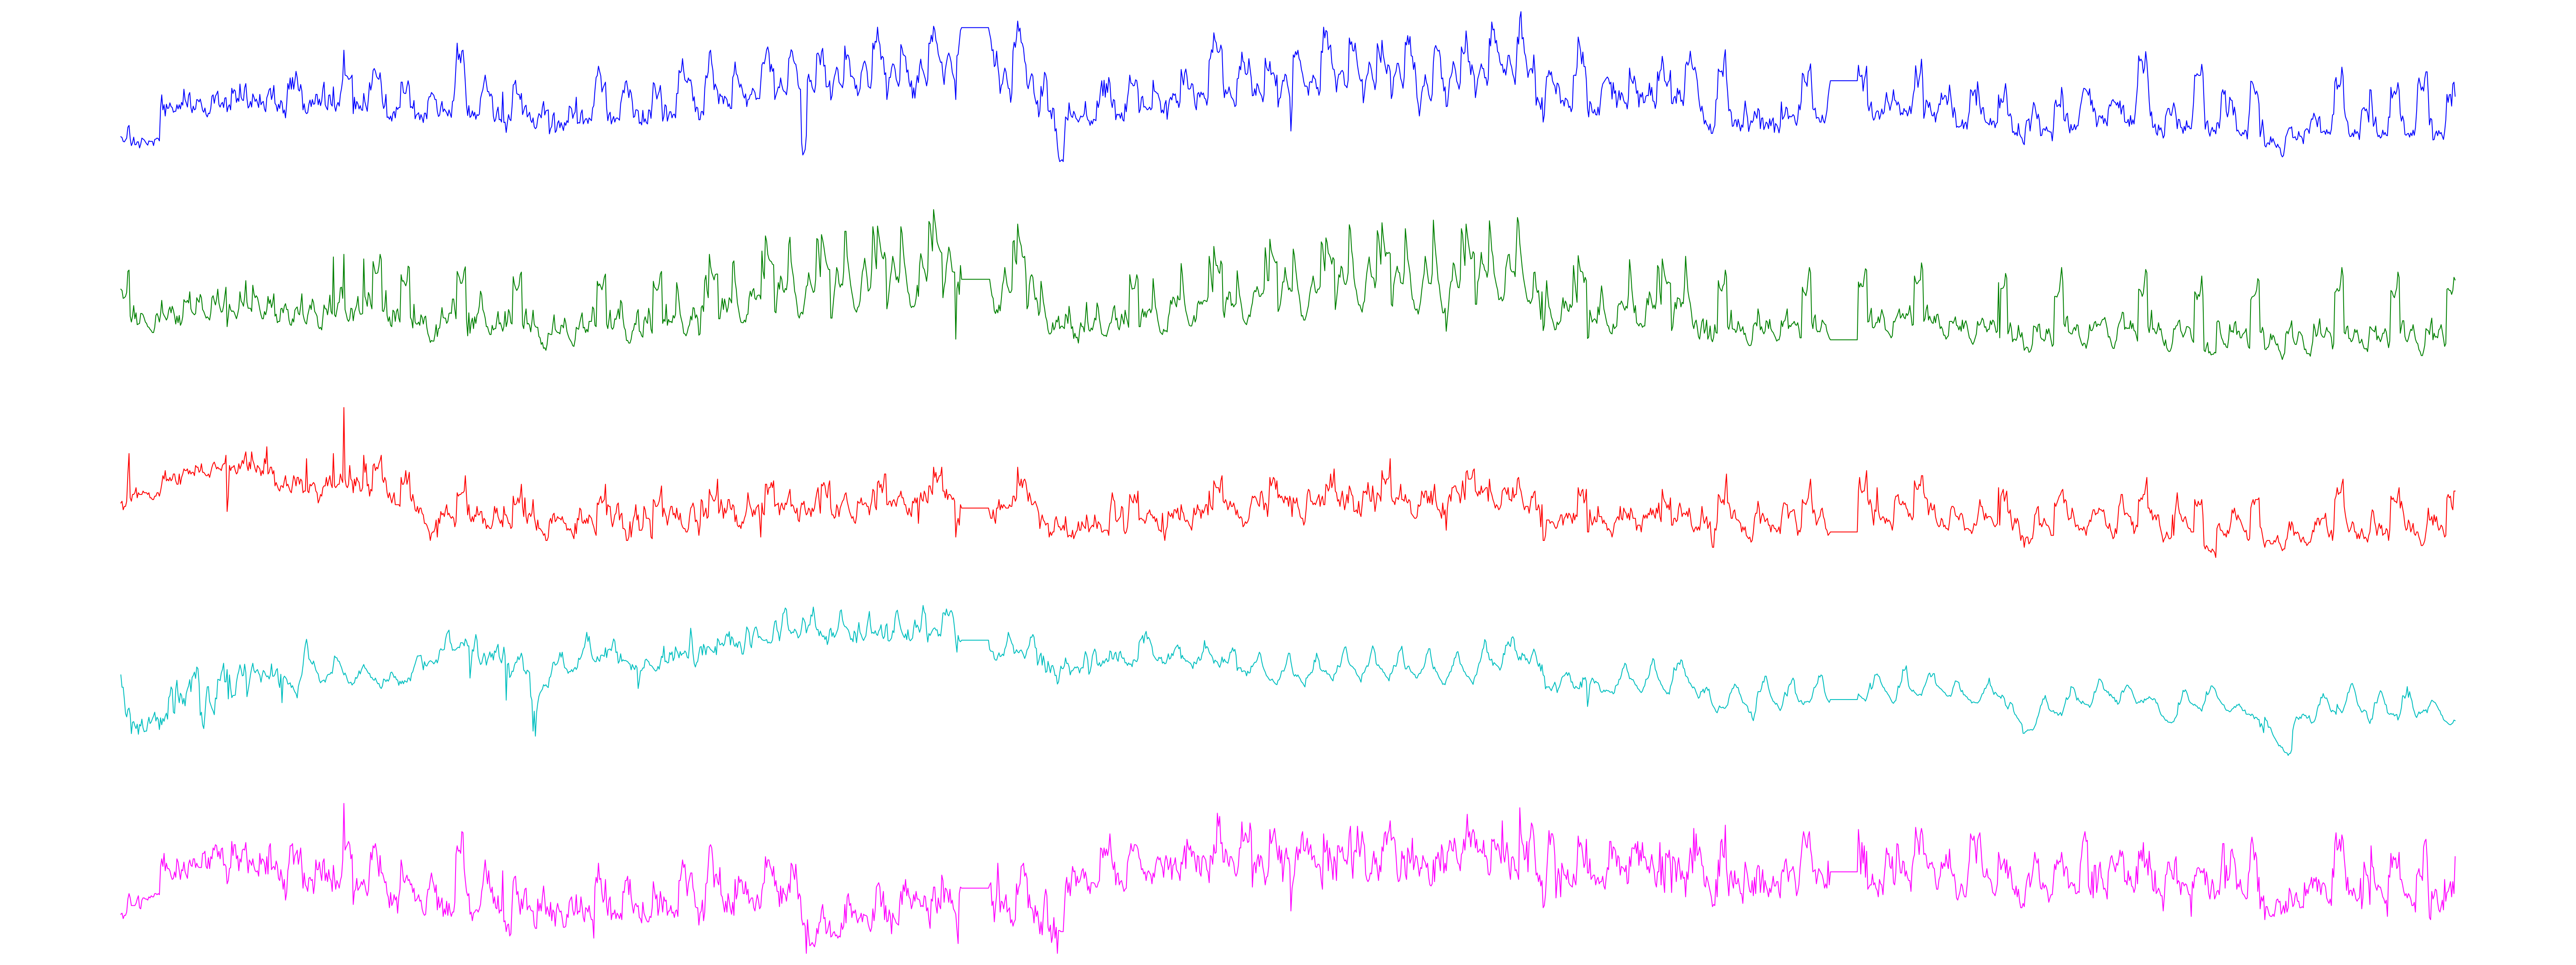

In [31]:
# fig = mvts_fig(dataset.data, 1, 3, 0,1000)
# fig

drawed_data = dataset.data[0:2000, [0,4,5,6,1]]
colors = ['blue', 'green', 'red', 'c', 'magenta']
fig, axs = plt.subplots(5,figsize=(80, 6*5))
for i in range(len(colors)):
    # 绘制时序数据
    axs[i].plot(drawed_data[:, i], color=colors[i])
    axs[i].axis('off')
fig